# Convolutions
In mathematics (in particular, functional analysis) convolution is a mathematical operation on two functions ($f$ and $g$) that produces a third function expressing how the shape of one is modified by the other.  
The term convolution refers to both the result function and to the process of computing it.  

In [385]:
"""Importing the required libraries"""
import cv2
import time
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10] # Bigger inline plots

We shall be resizing the images to $200\times200$ before convoluting it. This is mainly done to ensure faster computational time.

In [386]:
"""Image pre-processing"""
def preprocess_image(img, shape):
    img = cv2.resize(img, shape)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title('Raw Image')
    plt.show()
    return img

In [387]:
"""Display Image"""
def dispim(img, title=''):
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(title)
    plt.show()

In [388]:
"""Adds the appropriate padding to the input"""
def pad(x, kernel):
    m = kernel.shape[0]
    n = kernel.shape[1]
    pm = (m-1)//2
    pn = (n-1)//2
    x = np.pad(x, ((pm, pm),(pn, pn)), 'constant', constant_values=(0, 0))
    return x

In [389]:
"""2D Convolving function"""
def conv2D(x, kernel, method='valid'):
    
    if method == 'same':
        x = pad(x, kernel)
        
    M = x.shape[0]
    N = x.shape[1]
    m = kernel.shape[0]
    n = kernel.shape[1]
    
    convoluted = np.empty((M - m + 1, N - n + 1))
    # TODO: Vectorize
    for i in range(0, M - m + 1):
        for j in range(0, N - n + 1):
            submatrix = x[i:i+m, j:j+n]
            convoluted[i, j] = (np.sum([submatrix*kernel]))
    return convoluted

In [390]:
"""The kernel used for the edge detection"""
sobel = np.array([
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1]
])

## Edge Detection

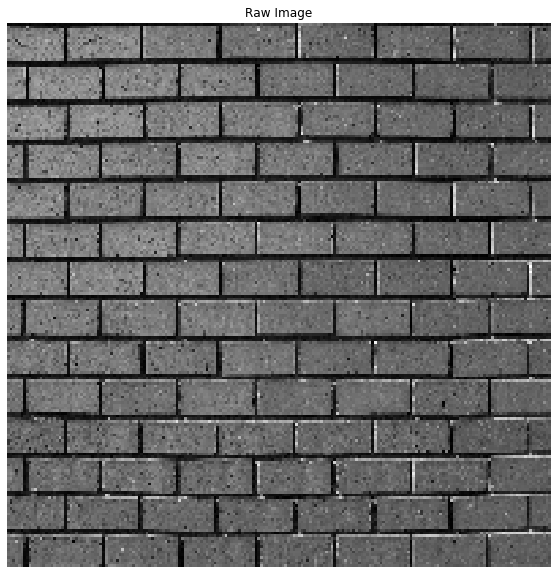

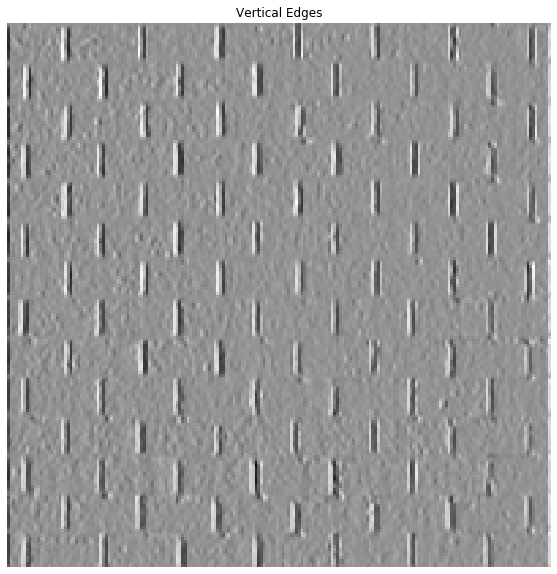

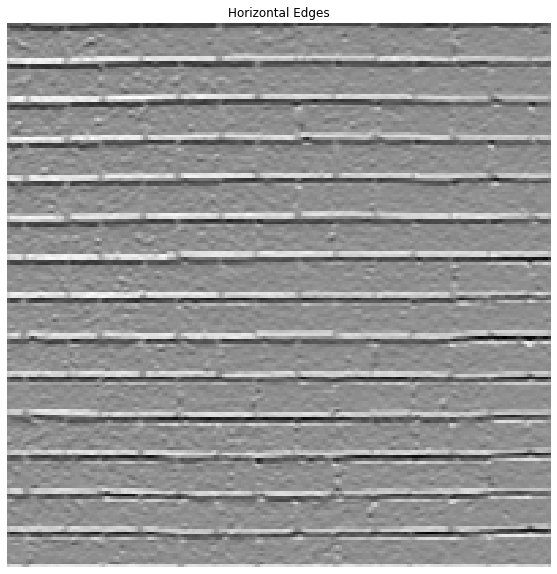

In [391]:
"""Main"""
img = cv2.imread('bricks.jpg', 0)
img = preprocess_image(img, (200, 200))
conv_vertical = conv2D(img, sobel, method='same')
dispim(conv_vertical, 'Vertical Edges')
conv_horizontal = conv2D(img, sobel.T, method='same')
dispim(conv_horizontal, 'Horizontal Edges')

As we can see, the horizontal edges and the vertical edges are detected quite accurately by the kernel used.  
Let's try some more kernels.

## Some more kernels

In [392]:
"""Identity"""
iden = np.array([
    [0, 0, 0],
    [0, 1, 0],
    [0, 0, 0]
])

"""Edge Detection"""
e1 = np.array([
    [1, 0, -1],
    [0, 0, 0],
    [-1, 0, 1]
])

e2 = np.array([
    [0, -1, 0],
    [-1, 4, -1],
    [0, -1, 0]
])

e3 = np.array([
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1]
])

"""Sharpen"""
shrp = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])

"""Box Blur/ Averaging filter"""
bb = np.ones((3, 3))

"""Gaussian Blur (Approximate)"""
gb = np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
])

kernels = [sobel, sobel.T, e1, e2, e3, sobel + sobel.T, shrp, bb, gb] # Best is e3

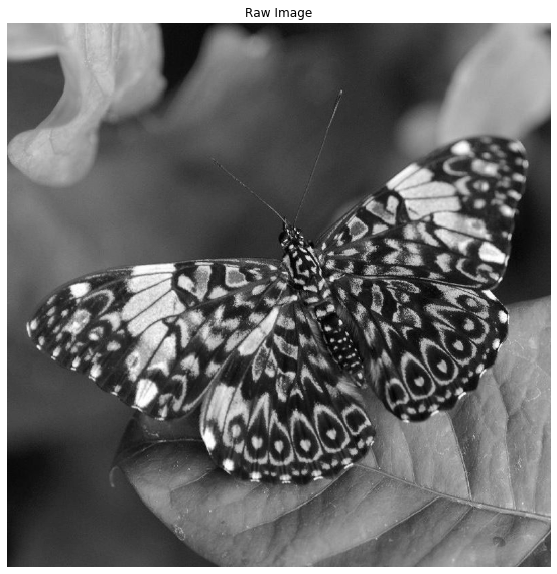

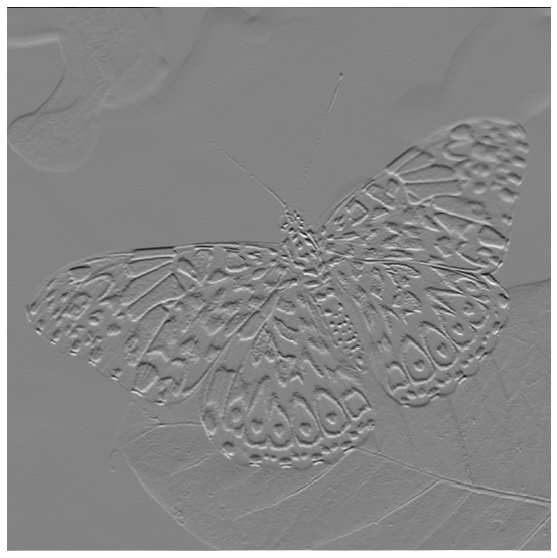

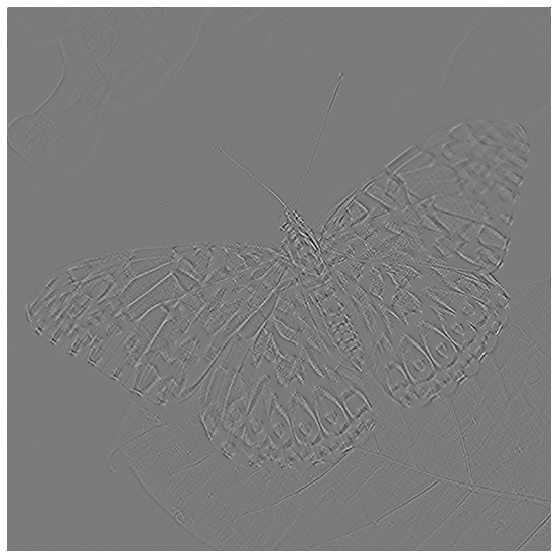

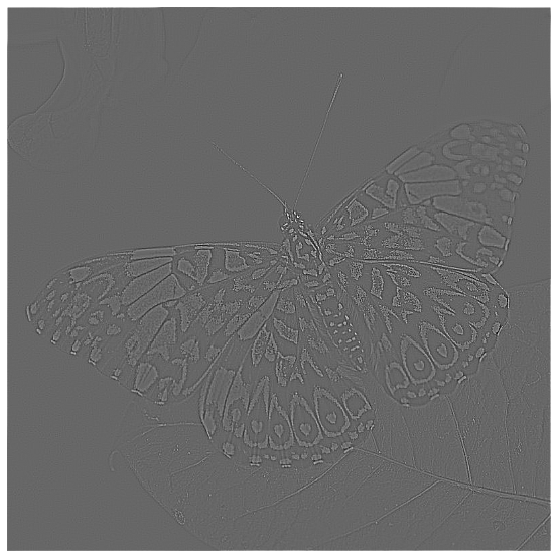

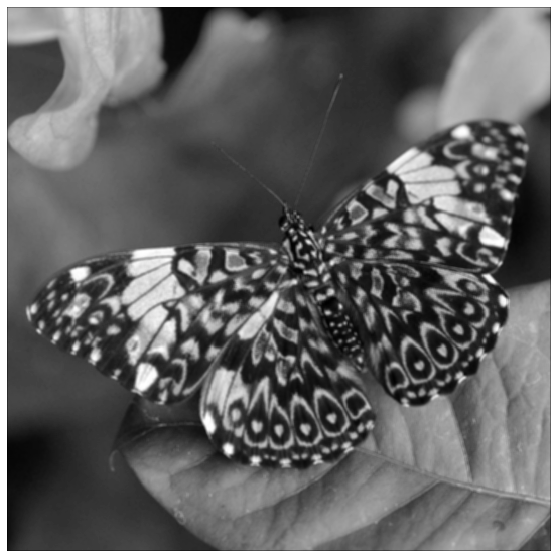

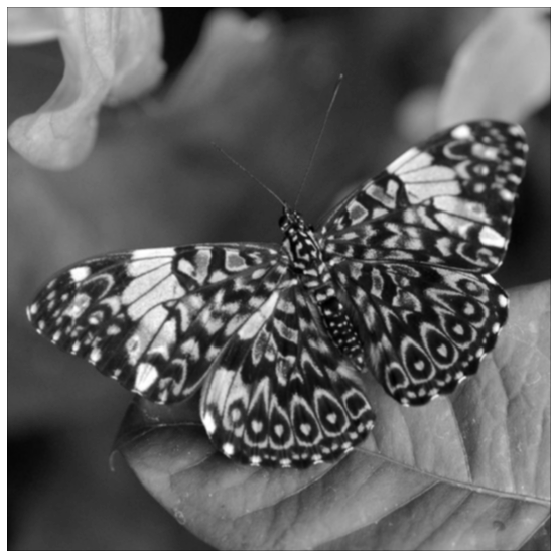

In [393]:
img = cv2.imread('butterfly.jpg', 0)
img = preprocess_image(img, (540, 540))
for k in kernels:
    k = k/np.sum(np.abs(k)) # Normalizing the filters to keep the "brightness" same
    c = conv2D(img, k, method='same')
    dispim(c)

## Simple Thresholding


In [394]:
def simple_thresh(img, threshold):
    t_img = img > threshold
    return t_img

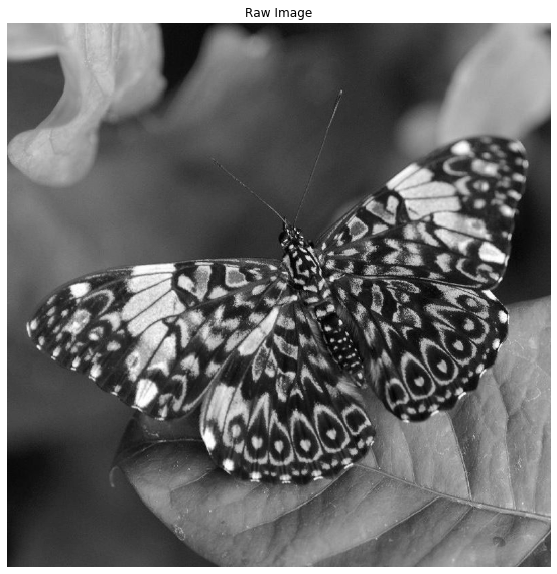

In [395]:
img = cv2.imread('butterfly.jpg', 0)
img = preprocess_image(img, (540, 540))

# Mean/Box Blur : Smoothens the image
bb = np.ones((5, 5))/81
b_img = conv2D(img, kernel=bb, method='same')
dispim(b_img, 'Mean Blurred')

custom_kernel = (sobel + sobel.T)
c_img = conv2D(b_img, kernel=custom_kernel, method='same')
dispim(c_img, 'Embossed?')

In [396]:
t_img = simple_thresh(c_img, 30) # Threshold selected empirically to select the butterfly
dispim(t_img)

In [429]:
def effect_1(img, threshold):
    # Mean/Box Blur : Smoothens the image
    bb = np.ones((7, 7))
    bb = bb/np.sum(bb)
    b_img = conv2D(img, kernel=bb, method='same')
    #dispim(b_img, 'Mean Blurred')

    custom_kernel = (sobel + sobel.T)
    c_img = conv2D(b_img, kernel=custom_kernel, method='same')
    #dispim(c_img, 'Embossed?')
    
    t_img = simple_thresh(c_img, threshold) # Threshold selected empirically to select the butterfly
    dispim(t_img)

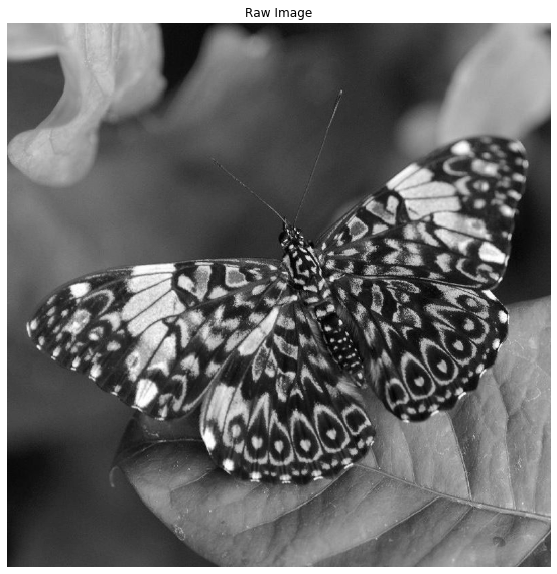

In [432]:
img = cv2.imread('butterfly.jpg', 0)
img = preprocess_image(img, (540, 540))
effect_1(img, 30)